# Time series(시계열) 분석
- Time series data: finance, economics, ecology(생태학), neuroscience(신경과학), physics 분야 등
    - Timestamps, specific instants in time
    - Fixed periods, such as the month January 2007 or the full year 2010
    - Intervals of time, indicated by a start and end timestamp. Periods can be thought of as special cases of intervals
    - Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time.
- pandas는 표준 시계열 도구와 data 알고리듬 제공
- 참고문헌
    - Python for Data Analysis (Ch.10, Ch.11), Wes Mckinney, O'Reily, 1st Edi., 2013.
    - https://www.slideshare.net/TIMEGATE07/ss-107535554

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

## 1. Date and Time Data Types and Tools

![표10-1](table10-1.PNG)

In [3]:
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2018, 11, 27, 0, 42, 7, 499511)

In [4]:
now.year, now.month, now.day

(2018, 11, 27)

In [13]:
delta = datetime(2018, 11, 27) - datetime(2018, 1, 1, 0, 1)
delta

datetime.timedelta(329, 86340)

In [14]:
delta.days

329

In [15]:
delta.seconds

86340

In [16]:
from datetime import timedelta
start = datetime(2018, 11, 27)
start + timedelta(12)

datetime.datetime(2018, 12, 9, 0, 0)

In [17]:
start - 2 * timedelta(12)

datetime.datetime(2018, 11, 3, 0, 0)

### Converting between string and datetime
- strftime: 포맷 규칙을 넘겨 문자열로 변환
- strptime: 문자열을 날자로 변환

In [18]:
stamp = datetime(2018, 11, 27)

In [19]:
str(stamp)

'2018-11-27 00:00:00'

In [36]:
stamp.strftime('%Y-%m-%d')

'2018-11-27'

### Datetime format 규칙

![Datetime format](table10-2-1.png)
![Datetime format](table10-2-2.png)

In [21]:
value = '2018-11-27'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2018, 11, 27, 0, 0)

In [22]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [23]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [25]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [26]:
datestrs

['7/6/2011', '8/6/2011']

#### pandas의 to_datetime method
- naT: Not a Time

In [28]:
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [33]:
idx[2]

NaT

In [32]:
pd.isnull(idx)

array([False, False,  True])

## 2. Time Series Basics
- pandas의 표준 라이브러리에서 제공되는 data type: **datetime, time, calendar module**

In [37]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.097627
2011-01-05    2.103743
2011-01-07    1.015967
2011-01-08    0.176459
2011-01-10    0.172509
2011-01-12    0.968605
dtype: float64

In [38]:
type(ts)
# note: output changed to "pandas.core.series.Series"

pandas.core.series.Series

In [39]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [41]:
ts[::2]

2011-01-02   -0.097627
2011-01-07    1.015967
2011-01-10    0.172509
dtype: float64

In [42]:
ts + ts[::2]

2011-01-02   -0.195254
2011-01-05         NaN
2011-01-07    2.031933
2011-01-08         NaN
2011-01-10    0.345018
2011-01-12         NaN
dtype: float64

In [44]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

- Timestamp는 datetime이 사용될 수 있는 곳에 교체 가능
- 빈도정보 저장, time zone 변환 방법을 알고 있음

In [45]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### 2.1 Indexing, selection, subsetting
- TimeSeries는 Series의 subclass

In [46]:
stamp = ts.index[2]
ts[stamp]

1.0159665102042237

In [47]:
ts['1/10/2011']

0.17250923987855576

In [48]:
ts['20110110']

0.17250923987855576

In [49]:
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.116847
2000-01-02   -1.273908
2000-01-03   -0.332339
2000-01-04    0.035242
2000-01-05    1.024279
2000-01-06    1.045044
                ...   
2002-09-21   -0.338605
2002-09-22    0.705575
2002-09-23    0.094539
2002-09-24    0.876873
2002-09-25    0.145580
2002-09-26   -0.377862
Freq: D, Length: 1000, dtype: float64

In [51]:
delta = datetime(2002, 9, 27) - datetime(2000, 1, 1)
delta

datetime.timedelta(1000)

In [52]:
longer_ts['2001']

2001-01-01   -1.552893
2001-01-02    0.231463
2001-01-03   -0.039412
2001-01-04    1.702038
2001-01-05    1.907276
2001-01-06   -0.740668
                ...   
2001-12-26   -1.432214
2001-12-27   -0.159191
2001-12-28   -0.144367
2001-12-29    0.382630
2001-12-30   -1.307713
2001-12-31   -0.646208
Freq: D, Length: 365, dtype: float64

In [53]:
longer_ts['2001-05']

2001-05-01   -0.317616
2001-05-02   -0.177923
2001-05-03    0.864442
2001-05-04   -2.054565
2001-05-05    0.394919
2001-05-06   -0.092104
                ...   
2001-05-26   -0.044560
2001-05-27    0.493024
2001-05-28   -0.878488
2001-05-29   -1.210962
2001-05-30   -0.924326
2001-05-31   -0.484582
Freq: D, Length: 31, dtype: float64

In [54]:
ts[datetime(2011, 1, 7):]

2011-01-07    1.015967
2011-01-08    0.176459
2011-01-10    0.172509
2011-01-12    0.968605
dtype: float64

In [55]:
ts

2011-01-02   -0.097627
2011-01-05    2.103743
2011-01-07    1.015967
2011-01-08    0.176459
2011-01-10    0.172509
2011-01-12    0.968605
dtype: float64

In [56]:
ts['1/6/2011':'1/11/2011']

2011-01-07    1.015967
2011-01-08    0.176459
2011-01-10    0.172509
dtype: float64

In [57]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.097627
2011-01-05    2.103743
2011-01-07    1.015967
2011-01-08    0.176459
dtype: float64

In [60]:
dates = pd.date_range('1/1/2018', periods=100, freq='W-WED')   # 수요일
dates

DatetimeIndex(['2018-01-03', '2018-01-10', '2018-01-17', '2018-01-24',
               '2018-01-31', '2018-02-07', '2018-02-14', '2018-02-21',
               '2018-02-28', '2018-03-07', '2018-03-14', '2018-03-21',
               '2018-03-28', '2018-04-04', '2018-04-11', '2018-04-18',
               '2018-04-25', '2018-05-02', '2018-05-09', '2018-05-16',
               '2018-05-23', '2018-05-30', '2018-06-06', '2018-06-13',
               '2018-06-20', '2018-06-27', '2018-07-04', '2018-07-11',
               '2018-07-18', '2018-07-25', '2018-08-01', '2018-08-08',
               '2018-08-15', '2018-08-22', '2018-08-29', '2018-09-05',
               '2018-09-12', '2018-09-19', '2018-09-26', '2018-10-03',
               '2018-10-10', '2018-10-17', '2018-10-24', '2018-10-31',
               '2018-11-07', '2018-11-14', '2018-11-21', '2018-11-28',
               '2018-12-05', '2018-12-12', '2018-12-19', '2018-12-26',
               '2019-01-02', '2019-01-09', '2019-01-16', '2019-01-23',
      

In [63]:
long_df = DataFrame(np.random.randn(100, 4),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['5-2019']

,Colorado,Texas,New York,Ohio
2019-05-01,0.261821,-0.190539,0.182129,-0.833196
2019-05-08,-0.592276,-0.190268,0.350505,-1.022118
2019-05-15,1.275354,0.109065,-1.298022,0.991412
2019-05-22,1.272033,-0.784603,-0.473527,-0.557657
2019-05-29,-0.318401,-0.314918,1.183868,-0.477677


### 2.2 Time series with duplicate indices

In [64]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dup_ts = Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [65]:
# index가 unique 하지 않음
dup_ts.index.is_unique

False

In [66]:
dup_ts['1/3/2000']  # not duplicated

4

In [67]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

In [68]:
# non-unique timestamp를 가진 data 수집
grouped = dup_ts.groupby(level=0)

In [69]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [70]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 3. Date ranges, Frequencies, and Shifting
- pandas에서의 기본 tie series는 불규칙(irregular)함 (주기가 정해지지 않음)
- resampling,주기추론, 고정주기 date 범위 생성을 위한 도구 제공

In [71]:
ts

2011-01-02   -0.097627
2011-01-05    2.103743
2011-01-07    1.015967
2011-01-08    0.176459
2011-01-10    0.172509
2011-01-12    0.968605
dtype: float64

In [76]:
# daily 주기 
resampler = ts.resample('D')
resampler

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

### 3.1 Generating date ranges
- date_range: 지정된 길이 만큼의 DatetimeIndex 생성

In [77]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

- date_range: 시작하는 날짜(끝나는 날짜), 생성할 기간

In [78]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [79]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [80]:
pd.date_range('1/1/2000', '12/1/2000', freq='BM')   # 'BM': business end of month

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [81]:
# 특정 시간 보존
pd.date_range('5/2/2012 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

- normalize: 정규화된 시간(자정)을 맞출 경우

In [82]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 3.2 Frequencies and Date Offsets
- 주기(frequecy): 
    - 기본(base) 빈도: 'M'(월별), 'H'(시간별)
    - 배수(multiplier): 정수의 곱
    
- ![base_frequence](table10-4.PNG)

In [83]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [84]:
four_hours = Hour(4)
four_hours

<4 * Hours>

In [85]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')   # 4시간 주기

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [86]:
Hour(2) + Minute(30)

<150 * Minutes>

In [87]:
pd.date_range('1/1/2000', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

#### Week of month dates(WOM)
- 예, 매월 셋째주 금요일

In [88]:
rng = pd.date_range('1/1/2012', '9/1/2012', freq='WOM-3FRI')
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 3.3 Shifting (leading and lagging) data
- naive shift: index는 변경하지 않고 data를 시간 축에서 앞이나 뒤로 이동

In [89]:
ts = Series(np.random.randn(4),
            index=pd.date_range('1/1/2000', periods=4, freq='M'))    # 'M': 월 마지막 일
ts

2000-01-31   -0.652436
2000-02-29    1.489416
2000-03-31    1.073745
2000-04-30   -0.433127
Freq: M, dtype: float64

In [90]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.652436
2000-04-30    1.489416
Freq: M, dtype: float64

In [91]:
ts.shift(-2)

2000-01-31    1.073745
2000-02-29   -0.433127
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [93]:
ts / ts.shift(1)  # 200002-29 : 1.489416/-0.652436 => -2.282852

2000-01-31         NaN
2000-02-29   -2.282852
2000-03-31    0.720917
2000-04-30   -0.403380
Freq: M, dtype: float64

In [94]:
# 주기를 넘겨주면 timestamp가 확장 => 1~4월 => 3~6월
ts.shift(2, freq='M')

2000-03-31   -0.652436
2000-04-30    1.489416
2000-05-31    1.073745
2000-06-30   -0.433127
Freq: M, dtype: float64

In [95]:
# 'D': 날짜 (색인이 3일 후로 이동)
ts.shift(3, freq='D')

2000-02-03   -0.652436
2000-03-03    1.489416
2000-04-03    1.073745
2000-05-03   -0.433127
dtype: float64

In [96]:
ts.shift(1, freq='3D')

2000-02-03   -0.652436
2000-03-03    1.489416
2000-04-03    1.073745
2000-05-03   -0.433127
dtype: float64

In [97]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.652436
2000-02-29 01:30:00    1.489416
2000-03-31 01:30:00    1.073745
2000-04-30 01:30:00   -0.433127
Freq: M, dtype: float64

#### Shifting dates with offsets

In [98]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [99]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [100]:
now + MonthEnd(2)    # 두번째 뭘말로 이동

Timestamp('2011-12-31 00:00:00')

In [101]:
offset = MonthEnd()
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [102]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

In [104]:
ts = Series(np.random.randn(20),
            index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15    0.518529
2000-01-19   -0.283926
2000-01-23    0.090012
2000-01-27    0.238689
2000-01-31    0.402692
2000-02-04   -0.356580
                ...   
2000-03-11    2.600245
2000-03-15    0.594164
2000-03-19    1.344417
2000-03-23    0.489036
2000-03-27   -0.005760
2000-03-31    1.450006
Freq: 4D, Length: 20, dtype: float64

In [105]:
ts.groupby(offset.rollforward).mean()

2000-01-31    0.193199
2000-02-29   -0.129181
2000-03-31    0.713967
dtype: float64

In [107]:
ts.resample('M').mean()

2000-01-31    0.193199
2000-02-29   -0.129181
2000-03-31    0.713967
Freq: M, dtype: float64

## 4. Time Zone Handling
- pytz: 전세계의 시간대(국제표준시 UTC) 정보를 모아둔 Olson database (1900년부터 UTC, 일광절약시간 저장)

In [108]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [114]:
tz = pytz.timezone('Asia/Seoul')
tz

<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>

In [113]:
pytz.all_timezones

['Africa/Abidjan',
 'Africa/Accra',
 'Africa/Addis_Ababa',
 'Africa/Algiers',
 'Africa/Asmara',
 'Africa/Asmera',
 'Africa/Bamako',
 'Africa/Bangui',
 'Africa/Banjul',
 'Africa/Bissau',
 'Africa/Blantyre',
 'Africa/Brazzaville',
 'Africa/Bujumbura',
 'Africa/Cairo',
 'Africa/Casablanca',
 'Africa/Ceuta',
 'Africa/Conakry',
 'Africa/Dakar',
 'Africa/Dar_es_Salaam',
 'Africa/Djibouti',
 'Africa/Douala',
 'Africa/El_Aaiun',
 'Africa/Freetown',
 'Africa/Gaborone',
 'Africa/Harare',
 'Africa/Johannesburg',
 'Africa/Juba',
 'Africa/Kampala',
 'Africa/Khartoum',
 'Africa/Kigali',
 'Africa/Kinshasa',
 'Africa/Lagos',
 'Africa/Libreville',
 'Africa/Lome',
 'Africa/Luanda',
 'Africa/Lubumbashi',
 'Africa/Lusaka',
 'Africa/Malabo',
 'Africa/Maputo',
 'Africa/Maseru',
 'Africa/Mbabane',
 'Africa/Mogadishu',
 'Africa/Monrovia',
 'Africa/Nairobi',
 'Africa/Ndjamena',
 'Africa/Niamey',
 'Africa/Nouakchott',
 'Africa/Ouagadougou',
 'Africa/Porto-Novo',
 'Africa/Sao_Tome',
 'Africa/Timbuktu',
 'Africa/

### 4.1 지역화(Localization)와 변환(Conversion)

In [116]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.300521
2012-03-10 09:30:00    2.188884
2012-03-11 09:30:00    0.407394
2012-03-12 09:30:00    1.436500
2012-03-13 09:30:00    0.511523
2012-03-14 09:30:00   -0.325494
Freq: D, dtype: float64

In [117]:
print(ts.index.tz)

None


In [118]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [124]:
# 지역화 시간으로의 변환
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-09 09:30:00+00:00   -0.300521
2012-03-10 09:30:00+00:00    2.188884
2012-03-11 09:30:00+00:00    0.407394
2012-03-12 09:30:00+00:00    1.436500
2012-03-13 09:30:00+00:00    0.511523
2012-03-14 09:30:00+00:00   -0.325494
Freq: D, dtype: float64

In [125]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [126]:
ts_utc.tz_convert('Asia/Seoul')

2012-03-09 18:30:00+09:00   -0.300521
2012-03-10 18:30:00+09:00    2.188884
2012-03-11 18:30:00+09:00    0.407394
2012-03-12 18:30:00+09:00    1.436500
2012-03-13 18:30:00+09:00    0.511523
2012-03-14 18:30:00+09:00   -0.325494
Freq: D, dtype: float64

In [127]:
ts_eastern = ts.tz_localize('Asia/Seoul')
ts_eastern.tz_convert('UTC')

2012-03-09 00:30:00+00:00   -0.300521
2012-03-10 00:30:00+00:00    2.188884
2012-03-11 00:30:00+00:00    0.407394
2012-03-12 00:30:00+00:00    1.436500
2012-03-13 00:30:00+00:00    0.511523
2012-03-14 00:30:00+00:00   -0.325494
Freq: D, dtype: float64

In [128]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 01:30:00+01:00   -0.300521
2012-03-10 01:30:00+01:00    2.188884
2012-03-11 01:30:00+01:00    0.407394
2012-03-12 01:30:00+01:00    1.436500
2012-03-13 01:30:00+01:00    0.511523
2012-03-14 01:30:00+01:00   -0.325494
Freq: D, dtype: float64

In [129]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### 4.2 Operations with time zone-aware Timestamp objects

In [130]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('US/Eastern')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

In [131]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

In [132]:
# UTC Timestamp 값을 UNIX epoch(1970.1.1)부터 현재까지의 nanosec로 저장
stamp_utc.value

1299902400000000000

In [133]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

In [134]:
# 일광절약시간 30 분 전
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [135]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [136]:
# 일광절약시간 90 분 전
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [137]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 4.3 Operations between different time zones
- 서로 다른 시간대를 갖는 두 시계열이 하나로 합쳐지면 결과는 UTC가 됨

In [226]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00   -0.912013
2012-03-08 09:30:00    0.002356
2012-03-09 09:30:00   -0.813126
2012-03-12 09:30:00    2.401862
2012-03-13 09:30:00    0.445610
2012-03-14 09:30:00    1.621349
2012-03-15 09:30:00    0.487200
2012-03-16 09:30:00   -1.683020
2012-03-19 09:30:00   -0.853879
2012-03-20 09:30:00   -1.793101
Freq: B, dtype: float64

In [227]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00   -1.626251
2012-03-12 09:30:00+00:00    4.803723
2012-03-13 09:30:00+00:00    0.891221
2012-03-14 09:30:00+00:00    3.242698
2012-03-15 09:30:00+00:00    0.974399
Freq: B, dtype: float64

## 5. Periods and Period Arithmetic
- Period class: 몇 일, 몇 개월, 몇 분기, 몇 년 같은 기간을 표현

In [228]:
p = pd.Period(2007, freq='A-DEC')   # 2007.1.1 ~ 2007.12.31
p

Period('2007', 'A-DEC')

In [141]:
p + 5        # 2012.1.1 ~ 2012.12.31

Period('2012', 'A-DEC')

In [142]:
p - 2       # 2005.1.1 ~ 2005.12.31

Period('2005', 'A-DEC')

In [143]:
pd.Period('2014', freq='A-DEC') - p

7

#### period_range: 
- 기간 범위 지정, PeriodIndex 생성

#### PeriodIndex class: 
- 순차적인 기간을 저장, 축 색인과 동일하게 사용

In [144]:
rng = pd.period_range('1/1/2000', '6/30/2000', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

In [145]:
Series(np.random.randn(6), index=rng)

2000-01    1.723652
2000-02    0.238357
2000-03   -0.875991
2000-04    0.920791
2000-05   -1.012022
2000-06    0.367008
Freq: M, dtype: float64

In [146]:
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 5.1 Period Frequency Conversion
- asfrq method: 다른 빈도로 변환

![빈도변환](fig10-1.png)

In [229]:
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [230]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [148]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

- 회계년도(fiscal year) 마지막 달이 12월이 아닌 경우, 관련된 monthly subperiod는 다름
- (2006.7 ~ 2007.6), (2007.7 ~ 2008.6), ...

In [149]:
p = pd.Period('2007', freq='A-JUN')    # 회계년도: 2006.7 ~ 2007.6
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [150]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

In [151]:
p = pd.Period('Aug-2007', 'M')   # 회계년도가 (2006.7 ~ 2007.6) 일 때 2007.8은 2008년 회계년도에 포함
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [152]:
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    0.008548
2007    1.526679
2008    0.851444
2009   -0.095633
Freq: A-DEC, dtype: float64

In [153]:
ts.asfreq('M', how='start')

2006-01    0.008548
2007-01    1.526679
2008-01    0.851444
2009-01   -0.095633
Freq: M, dtype: float64

In [154]:
ts.asfreq('B', how='end')

2006-12-29    0.008548
2007-12-31    1.526679
2008-12-31    0.851444
2009-12-31   -0.095633
Freq: B, dtype: float64

### 5.2 Quarterly period frequencies

![분기빈도예](fig10-2.PNG)

In [233]:
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [234]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [235]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

In [236]:
p4pm = p.asfreq('B', 'e') - 1    # p 회계년도 (2011.12.01 ~ 2012.01.31)
p4pm

Period('2012-01-30', 'B')

In [237]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

In [159]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

- 분기 범위 지정

In [238]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = Series(np.arange(len(rng)), index=rng)
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [161]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

### 5.3 Converting Timestamps to Periods (and back)
- to_period method: timestamp로 색인된 Series나 DataFrame을 Period로 변환

In [162]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')   # 'M': 월 마지막일
ts = Series(randn(3), index=rng)
pts = ts.to_period()
ts

2000-01-31    0.233011
2000-02-29   -0.472272
2000-03-31    1.376619
Freq: M, dtype: float64

In [163]:
pts

2000-01    0.233011
2000-02   -0.472272
2000-03    1.376619
Freq: M, dtype: float64

In [239]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2

2000-01-29   -0.701105
2000-01-30   -0.612961
2000-01-31    0.122764
2000-02-01   -0.050040
2000-02-02   -1.119569
2000-02-03    0.374989
Freq: D, dtype: float64

In [240]:
ts2.to_period('M')

2000-01   -0.701105
2000-01   -0.612961
2000-01    0.122764
2000-02   -0.050040
2000-02   -1.119569
2000-02    0.374989
Freq: M, dtype: float64

In [165]:
pts = ts.to_period()
pts

2000-01    0.233011
2000-02   -0.472272
2000-03    1.376619
Freq: M, dtype: float64

In [241]:
pts.to_timestamp(how='end')

2000-01-31    0.233011
2000-02-29   -0.472272
2000-03-31    1.376619
Freq: M, dtype: float64

### 5.4 Creating a PeriodIndex from arrays
- 두개의 빈도값을 조합해서 DataFrame에서 사용

In [168]:
data = pd.read_csv('macrodata.csv')
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
5      1960.0
        ...  
197    2008.0
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [169]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [170]:
# year와 quarter를 조합해서 기간색인 생성
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [171]:
data.index = index
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 6. Resampling and Frequency Conversion
- resampling: 시계열의 빈도를 변환
- downsampling: 상위 빈도를 하위 빈도로 집계
- upsampling: 하위 빈도를 상위 빈도로 집계

![resampling method](table10-5.PNG)

In [242]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01   -0.297088
2000-01-02   -0.457509
2000-01-03    2.116510
2000-01-04    0.416986
2000-01-05   -0.532517
2000-01-06    0.043629
                ...   
2000-04-04    0.175580
2000-04-05    0.699617
2000-04-06    0.572621
2000-04-07    0.403716
2000-04-08   -1.565781
2000-04-09    0.236032
Freq: D, Length: 100, dtype: float64

In [243]:
ts.resample('M').mean()

2000-01-31    0.227646
2000-02-29   -0.025256
2000-03-31   -0.003458
2000-04-30    0.048197
Freq: M, dtype: float64

In [245]:
ts.resample('M', kind='period').mean()

2000-01    0.227646
2000-02   -0.025256
2000-03   -0.003458
2000-04    0.048197
Freq: M, dtype: float64

### 6.1 Downsampling
- 집계할 데이터는 고정빈도일 필요가 없으며 원하는 주기로 정의
- 각 간격의 양 끝 중에서 open해 둘 쪽(시작, 끝)
- 집계하려는 구간의 라벨을 간격의 시작으로 할지 끝으로 할지 지정

In [247]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [249]:
# 5분 단위로 묶음: [00, 05), [05,10), [10,)
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [250]:
# 5분 단위로 묶음: (, 00], (00,05], (05, 10]
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [251]:
# 5분 단위로 묶음: [00, 05), [05,10), [10,)
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [252]:
# 5분 단위로 묶음: (, 00], (00,05], (05, 10], 라벨 이름 구간의 right(닫힌쪽)
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

![closed_label](fig10-3.PNG)

In [253]:
# loffset: 색인 이동 
ts.resample('5min', closed='right',label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling
- 구간의 시작가(open), 고가(high), 저가(low), 종료가(close)

In [254]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

In [256]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
              ..
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int32

In [257]:
ts.groupby(lambda x: x.month).mean()

1    15
2    45
3    75
4    95
dtype: int32

In [258]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### 6.2 Upsampling and interpolation
- 하위 주기에서 상위 주기

In [259]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,1.504280,-0.247637,1.414443,1.529557
2000-01-12,-0.580027,-0.238759,0.309846,1.695580


In [260]:
# 하위 주기로 변환시 누락된 겂 발생
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,1.504280,-0.247637,1.414443,1.529557
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.580027,-0.238759,0.309846,1.695580


In [261]:
# 누락된 값 앞 데이터로 채워 넣기
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,1.504280,-0.247637,1.414443,1.529557
2000-01-06,1.504280,-0.247637,1.414443,1.529557
2000-01-07,1.504280,-0.247637,1.414443,1.529557
2000-01-08,1.504280,-0.247637,1.414443,1.529557
2000-01-09,1.504280,-0.247637,1.414443,1.529557
2000-01-10,1.504280,-0.247637,1.414443,1.529557
2000-01-11,1.504280,-0.247637,1.414443,1.529557
2000-01-12,-0.580027,-0.238759,0.309846,1.695580


In [262]:
# 누락된 값 앞 데이터로 채워 넣을 떼 적용 범위
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,1.504280,-0.247637,1.414443,1.529557
2000-01-06,1.504280,-0.247637,1.414443,1.529557
2000-01-07,1.504280,-0.247637,1.414443,1.529557
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.580027,-0.238759,0.309846,1.695580


In [263]:
# 새로운 날짜 색인 => 이전 색인과 겹치지 않음
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,1.504280,-0.247637,1.414443,1.529557
2000-01-13,-0.580027,-0.238759,0.309846,1.695580


### 6.3 Resampling with periods

In [264]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.349620,-0.334853,-1.533461,0.811806
2000-02,-1.218180,-0.221435,-0.028240,-0.402683
2000-03,-1.332618,-1.707830,-0.341593,0.083796
2000-04,0.195381,0.459068,1.342316,0.571418
2000-05,-0.760034,-0.608227,1.480323,1.194805
2000-06,0.637462,-1.147821,-0.142690,0.060318
...,...,...,...,...
2001-07,-0.802329,1.107472,-0.049482,-1.318616
2001-08,-0.353822,-3.497886,-1.060902,-1.461346
2001-09,-1.648200,-0.678220,-0.701926,0.656936


In [265]:
# 회계기간(1월~12월)으 평균
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.140879,-0.329293,0.193552,0.072749
2001,0.058833,0.008905,-0.032439,-0.038188


In [266]:
# 12월 마지막으로 하는 분기별, 누락된 분기값은 앞 분기 값으로 채움
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.140879,-0.329293,0.193552,0.072749
2000Q2,-0.140879,-0.329293,0.193552,0.072749
2000Q3,-0.140879,-0.329293,0.193552,0.072749
2000Q4,-0.140879,-0.329293,0.193552,0.072749
2001Q1,0.058833,0.008905,-0.032439,-0.038188
2001Q2,0.058833,0.008905,-0.032439,-0.038188
2001Q3,0.058833,0.008905,-0.032439,-0.038188
2001Q4,0.058833,0.008905,-0.032439,-0.038188


In [267]:
# 
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.140879,-0.329293,0.193552,0.072749
2001Q1,-0.140879,-0.329293,0.193552,0.072749
2001Q2,-0.140879,-0.329293,0.193552,0.072749
2001Q3,-0.140879,-0.329293,0.193552,0.072749
2001Q4,0.058833,0.008905,-0.032439,-0.038188


In [268]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.140879,-0.329293,0.193552,0.072749
2000Q2,-0.140879,-0.329293,0.193552,0.072749
2000Q3,-0.140879,-0.329293,0.193552,0.072749
2000Q4,-0.140879,-0.329293,0.193552,0.072749
2001Q1,0.058833,0.008905,-0.032439,-0.038188
2001Q2,0.058833,0.008905,-0.032439,-0.038188
2001Q3,0.058833,0.008905,-0.032439,-0.038188
2001Q4,0.058833,0.008905,-0.032439,-0.038188


In [269]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.140879,-0.329293,0.193552,0.072749
2001Q1,-0.140879,-0.329293,0.193552,0.072749
2001Q2,-0.140879,-0.329293,0.193552,0.072749
2001Q3,-0.140879,-0.329293,0.193552,0.072749
2001Q4,0.058833,0.008905,-0.032439,-0.038188
2002Q1,0.058833,0.008905,-0.032439,-0.038188
2002Q2,0.058833,0.008905,-0.032439,-0.038188
2002Q3,0.058833,0.008905,-0.032439,-0.038188


## 7. Time series plotting
- pandas의 시계열 그래프
- yahoo!finance 데이터

In [272]:
close_px_all = pd.read_csv('stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


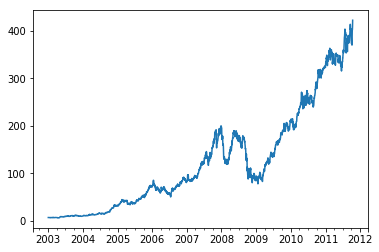

In [196]:
# APPLE의 일별 주가
close_px['AAPL'].plot()

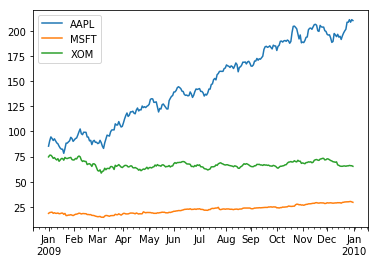

In [273]:
# 2009년의 모든 시계열 그래프
close_px.loc['2009'].plot()

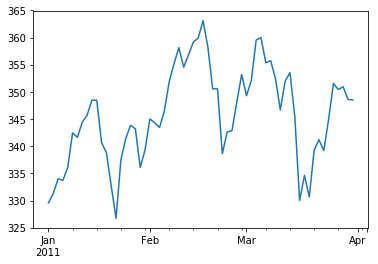

In [274]:
# 특정 회사, 기간
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

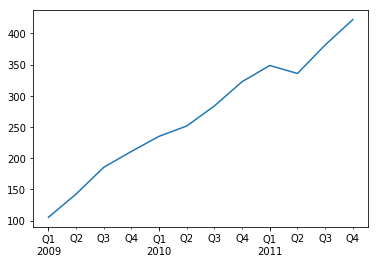

In [276]:
# 분기 그래프
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

## 8. Moving window functions
- 이동창함수: 고정 크기의 창(window)를 가지지 않는 함수

![이동창함수_지수가중함수](table10-6.png)

In [277]:
close_px = close_px.asfreq('B').fillna(method='ffill')

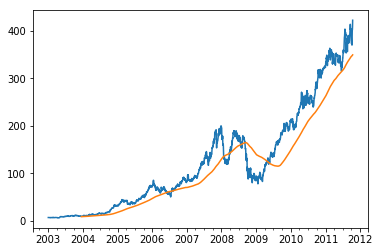

In [278]:
# rolling(250) : moving window
close_px.AAPL.plot()
close_px.AAPL.rolling(250).mean().plot()

In [279]:
# rolling(250)은 NA 값이 아닌 관측값 250개,
# 누락된 data와 시작지점 data의 window 구간 확인
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

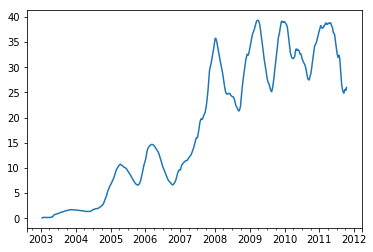

In [205]:
appl_std250.plot()

In [280]:
# expanding window mean: 
# time window는 time series의 beginning부터 시작하여 전체 series를 퐇마할 때까지 window 증가
expanding_mean = appl_std250.expanding().mean()

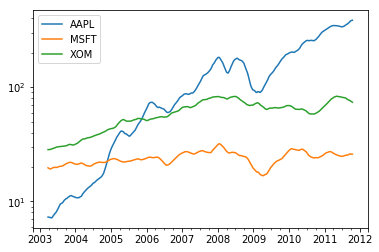

In [281]:
close_px.rolling(60).mean().plot(logy=True)

In [282]:
# a 20-day rolling mean 계산
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
...,...,...,...
2011-10-07,392.479333,25.712000,72.454667
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000


In [210]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
...,...,...,...
2011-10-07,392.479333,25.712000,72.454667
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000


### 8.1 Exponentially-weighted functions

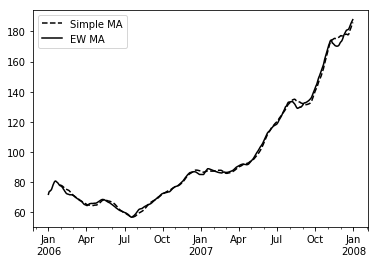

In [284]:
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--', label='Simple MA')

ewma60.plot(style='k-', label='EW MA')
plt.legend()

### Binary moving window functions
- 산관관계, 공분산은 2개의 시계열을 필요 (지수와 주싯의 상관관계)

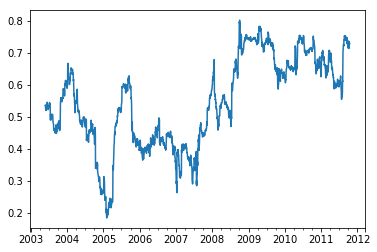

In [285]:
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

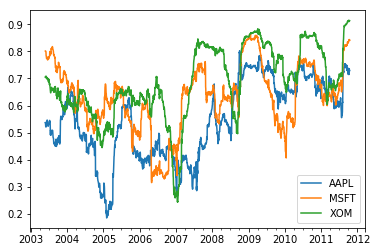

In [286]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-defined moving window functions

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


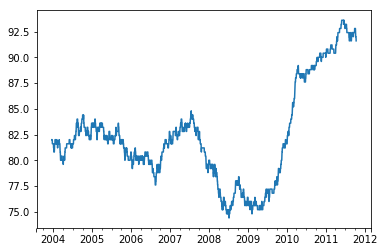

In [288]:
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()